# 1- Título e Introdução

Criar uma Rede Neural capaz de prever o risco de ocorrência de enchentes em áreas urbanas, usando os dados de entrada mencionados. A entrega final deverá ser feita através do Google Colab.

# 2- Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 3- Descrição das bibliotecas

- **pandas / numpy**: manipulação e análise de dados tabulares.
- **matplotlib / seaborn**: visualização de dados e gráficos exploratórios.
- **sklearn**: ferramentas de machine learning como pré-processamento, divisão de dados e métricas.
- **tensorflow / keras**: construção, treinamento e avaliação da rede neural.


# 4- Carregamento e Exploração do Dataset

In [2]:
df = pd.read_csv('/content/flood_risk_dataset_india.csv')

df.head()
df.info()
df.describe()
df.tail()
df.select_dtypes(include=['object']).columns

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                10000 non-null  float64
 1   Longitude               10000 non-null  float64
 2   Rainfall (mm)           10000 non-null  float64
 3   Temperature (°C)        10000 non-null  float64
 4   Humidity (%)            10000 non-null  float64
 5   River Discharge (m³/s)  10000 non-null  float64
 6   Water Level (m)         10000 non-null  float64
 7   Elevation (m)           10000 non-null  float64
 8   Land Cover              10000 non-null  object 
 9   Soil Type               10000 non-null  object 
 10  Population Density      10000 non-null  float64
 11  Infrastructure          10000 non-null  int64  
 12  Historical Floods       10000 non-null  int64  
 13  Flood Occurred          10000 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memo

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,Agricultural,Clay,6943.559433,0,0,0
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,Forest,Clay,3011.997459,1,0,0
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,Desert,Clay,7149.938303,1,0,1
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,Water Body,Sandy,906.031452,1,0,1


# 5- Análise Exploratória dos Dados

- O dataset contém informações sobre enchentes como nível da água, chuva acumulada, umidade, etc.
- Algumas colunas podem precisar de encoding, como a "Land Cover" e "Soil".
- Não há muitos valores ausentes, o que facilita o processamento.
- A variável target indica se houve enchente.


# 6- Pré-processamento dos Dados

In [3]:
# Verificando se há duplicatas
duplicatas = df.duplicated()
duplicatas.sum()

np.int64(0)

In [4]:
#Verificando se há valores nulos
df.isnull().sum()

,0
Latitude,0
Longitude,0
Rainfall (mm),0
Temperature (°C),0
Humidity (%),0
River Discharge (m³/s),0
Water Level (m),0
Elevation (m),0
Land Cover,0
Soil Type,0


In [5]:
#Verificando se há informações fora do comum, como outliers e afins.

print("Umidade fora do intervalo [0, 100]:")
print(df[(df['Humidity (%)'] < 0) | (df['Humidity (%)'] > 100)])

print("Temperaturas fora da faixa [-30, 60]:")
print(df[(df['Temperature (°C)'] < -30) | (df['Temperature (°C)'] > 60)])

print("Rainfall negativa:")
print(df[df['Rainfall (mm)'] < 0])

print("River Discharge negativo:")
print(df[df['River Discharge (m³/s)'] < 0])

print("Water Level muito extremo:")
print(df[(df['Water Level (m)'] < -5) | (df['Water Level (m)'] > 50)])

print("Altitude muito fora do normal:")
print(df[(df['Elevation (m)'] < -500) | (df['Elevation (m)'] > 9000)])

print("Densidade populacional negativa:")
print(df[df['Population Density'] < 0])

Umidade fora do intervalo [0, 100]:
Empty DataFrame
Columns: [Latitude, Longitude, Rainfall (mm), Temperature (°C), Humidity (%), River Discharge (m³/s), Water Level (m), Elevation (m), Land Cover, Soil Type, Population Density, Infrastructure, Historical Floods, Flood Occurred]
Index: []
Temperaturas fora da faixa [-30, 60]:
Empty DataFrame
Columns: [Latitude, Longitude, Rainfall (mm), Temperature (°C), Humidity (%), River Discharge (m³/s), Water Level (m), Elevation (m), Land Cover, Soil Type, Population Density, Infrastructure, Historical Floods, Flood Occurred]
Index: []
Rainfall negativa:
Empty DataFrame
Columns: [Latitude, Longitude, Rainfall (mm), Temperature (°C), Humidity (%), River Discharge (m³/s), Water Level (m), Elevation (m), Land Cover, Soil Type, Population Density, Infrastructure, Historical Floods, Flood Occurred]
Index: []
River Discharge negativo:
Empty DataFrame
Columns: [Latitude, Longitude, Rainfall (mm), Temperature (°C), Humidity (%), River Discharge (m³/s), W

In [6]:
#Aplicando One-Hot Encoding nas variáveis categóricas não-ordinais.
df = pd.get_dummies(df, columns=['Land Cover', 'Soil Type'], drop_first=False, dtype=int)

In [7]:
# Tirando a variável target do DataFrame, normalizando os dados e separando os conjuntos de dados de teste e treinamento
X, y = df.drop(columns=['Flood Occurred']), df['Flood Occurred']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7- Explicação do Pré-processamento


Durante o pré-processamento, verificamos a presença de duplicatas, valores nulos e outliers, além de aplicar One-Hot Encoding nas variáveis categóricas. Em seguida, dividimos o conjunto de dados em 80% para treinamento e 20% para teste. Nenhuma anomalia relevante foi identificada durante essa etapa, indicando que os dados estavam em boas condições para o uso no modelo



# 8- Construção do Modelo de Rede Neural


In [8]:
#Arquitetura do modelo
model = tf.keras.Sequential(
  [
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ]
)

model.compile(
  optimizer = 'adam',
  loss= "binary_crossentropy",
  metrics=['accuracy', 'precision', 'recall', 'auc']
)


# 9- Explicação da Arquitetura do Modelo

A arquitetura do modelo foi escolhida baseada em testes, utilizando algumas técnicas como o dropout para desligamento de neurônios visando aumentar o aprendizado e acurácia do modelo. Utilizamos a função de ativação Sigmoid na última camada por se tratar de uma classificação binária (0 ou 1). Pelo mesmo motivo, usamos a função de binary_crossentropy para o loss. As métricas utilizadas são as sugeridas no documento.

# 10- Treinamento do Modelo


In [9]:
training = model.fit(X_train_scaled, y_train, epochs= 25, validation_data =(X_test_scaled, y_test))

metrics_names = model.metrics_names
results = model.evaluate(X_test_scaled, y_test, verbose=0)

for name, value in zip(metrics_names, results):
    print(f"{name}: {value:.4f}")


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5061 - auc: 0.4918 - loss: 0.9646 - precision: 0.5068 - recall: 0.9087 - val_accuracy: 0.4935 - val_auc: 0.4966 - val_loss: 0.7104 - val_precision: 0.5111 - val_recall: 0.4681
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4904 - auc: 0.4951 - loss: 0.7126 - precision: 0.4899 - recall: 0.4885 - val_accuracy: 0.5020 - val_auc: 0.5051 - val_loss: 0.6996 - val_precision: 0.5235 - val_recall: 0.4091
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5037 - auc: 0.5073 - loss: 0.7005 - precision: 0.5046 - recall: 0.4773 - val_accuracy: 0.5075 - val_auc: 0.5108 - val_loss: 0.6975 - val_precision: 0.5365 - val_recall: 0.3482
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4965 - auc: 0.5011 - loss: 0.7000 - precision: 0.4950 - recall: 0.4408 - val_accuracy: 0.5110 - val_auc: 0.5151 - val_loss: 0.6963 - val_precision: 0.5470 - val_recall: 0.3153
Epoch 5/25
250/250 ━━━━━━━━━━━

# 11- Análise do Treinamento

Analisando os resultados obtidos pelo modelo, percebemos que o modelo não tem um bom aprendizado levando em consideração a acurácia... O loss do modelo também está muito alto, o que significa que o modelo não está tendo um aprendizado eficiente.

# 12 - Avaliação e Validação

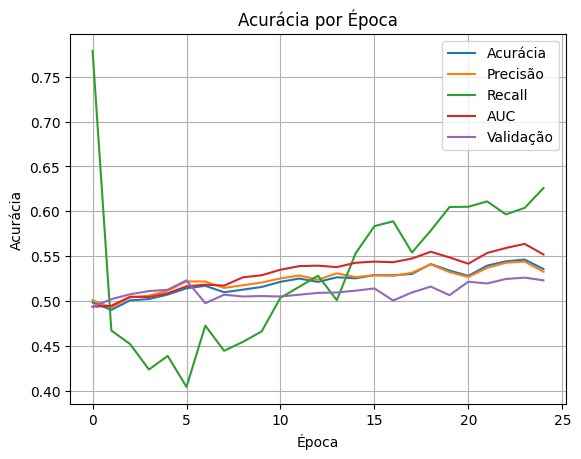

In [10]:
plt.plot(training.history['accuracy'], label='Acurácia')
plt.plot(training.history['precision'], label='Precisão')
plt.plot(training.history['recall'], label='Recall')
plt.plot(training.history['auc'], label='AUC')
plt.plot(training.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

# 13 - Discussão dos Resultados

Os resultados não foram satisfatórios, o modelo não aprende bem mesmo com algumas alterações feitas e testadas. Todas as métricas estão ruins ou medianas. Acreditamos que o problema esteja com os dados (features), que não são suficientes para determinar se houve ou não enchentes (variável target). Obtivemos overfitting e muitos problemas de generalização.

Uma melhoria futura seria fazer feature engineering, para melhorarmos a relação das features com o target, tornando assim, dados mais eficientes para o aprendizado da rede neural. Algo como combinarmos duas features existentes para criar uma nova, por exemplo. Outra opção seria utilizarmos outro modelo pra aprendizado, como sugestão teria o Random Forest.

 # 14 - Conclusões e Próximos Passos

Foi desenvolvido uma Rede Neural MLP (Feed Forward) que tem como objetivo prever enchentes. Durante a arquitetura do modelo fizemos diversos testes para acharmos os melhores hiper-parâmetros, funções, quantidades de neurônios e técnicas de dropout. Ainda assim, não obtivemos um resultado satisfatório, embora tenhamos tentado diversas arquiteturas. Fizemos Análise de Correlação, PCA, Matriz de Confusão, Predição Binária e afins, e nessa análise, identificamos que de fato, os dados não são de boa qualidade para o modelo.

Os próximos passos seriam melhoramos a qualidade dos dados através de estratégias como o feature engineering, usarmos transfer learning com modelos pré-treinados, e gerarmos mais dados sintéticos.

Abaixo, segue algumas explorações que foram desenvolvidas:

In [ ]:
#Análise de correlação
correlation = df.corr(numeric_only=True)["Flood Occurred"].sort_values(ascending=False)
sns.barplot(x=correlation.values, y=correlation.index)
plt.title("Correlação com Flood Occurred")

# Predição binária
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))
